# Descripción del proyecto

La tienda online Ice que vende videojuegos por todo el mundo ha encomendado identificar patrones que determinen si un juego tiene éxito o no con el fin de detectar proyectos prometedores y planificar campañas publicitarias. Contamos con todos los datos  de: las reseñas de usuarios y expertos, los géneros, las plataformas y los datos históricos sobre las ventas de juegos que están disponibles en fuentes abiertas (los datos se remontan a 2016).
A continuación se detallan los pasos a seguir para completar el proyecto:

### Carga de datos y evaluación general de la información
Se cargará el archivo con los datos proporcionados y se realizará una evaluación general de la misma con el objetivo de detectar: datos ausentes, tipo de objetos incorrectos,  cantidad de datos proporcionados, etc.

### Preparación de datos

En función al análisis del primer paso, se procederá a realizar las correcciones necesarias de los tipos de datos y/o nombres de las columnas y a completar valores ausentes (si fuera posible). 
A su vez, se agregara columnas que fueran necesarias para realizar cálculos en el paso siguiente.

###  Análisis de datos

En este paso realizaremos distintos tipos de análisis para determinar:
* Cuántos juegos fueron lanzados en diferentes años.
* Cómo varían las ventas de una plataforma a otra: cuales tienen mayores y menores ventas, cuanto tardan en aparecer/desaparecer las distintas plataformas, cuáles crecen y cuáles se reducen, cuales son potencialmente rentables.
* Las ventas globales de todos los juegos, desglosados por plataforma y la diferencia entre sus ventas promedio.
* El impacto de las reseñas de usuarios y profesionales sobre  las ventas de una plataforma popular 
* Las ventas de los mismos juegos en distintas plataformas.
* La distribución general de los juegos por género y la rentabilidad de los mismos

###  Creación de un perfil de usuario para cada región

Para cada región se analizarán:
* Las cinco plataformas principales y sus cuotas de mercado
* Los cinco géneros principales
* El impacto de las clasificaciones de ESRB sobre las ventas

###  Prueba de hipótesis:

Se probarán las siguientes hipótesis para luego sacar conclusiones:

* Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

### Conclusión general

Se detallaran en este paso, todos los hallazgos resultante de los análisis de los pasos anteriores


 ##  Carga de datos y evaluación general de la información

In [3]:
#importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [4]:
#cargamos los datos
df= pd.read_csv('/datasets/games.csv')

In [5]:
#informacion general
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- EL dataset presenta valores ausentes y tipo de datos incorrectos

In [6]:
df.head()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


 ## Preparación de los datos

In [7]:
#Nombres de las columnas a minusculas
df.columns= df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
#cambiamos tipo de dato de user score y de year_of _release al tipo float e integer respectivamente

df['year_of_release'] = df['year_of_release'].astype('Int64')

# el valor TDB de user score se reemplaza por NAN par aluego poder convertir los datos al tipo float
df['user_score']= df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [9]:
#completamos los ausentes de categoricas con "unknown"
df['name'] = df['name'].fillna('unknown')
df['genre'] = df['genre'].fillna('unknown')

- Los valores ausentes de score no pueden completarse a partir de datos del dataset, por lo que no se rellenan. Los valores ausentes de rating y año de lanzamiento tampoco pueden rellenarse con valores del dataset, podria evaluarse de ser necesario adquirir dicha informacion de una fuente externa
   

In [10]:
#calculo de ventas totales
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38


## Analisis de datos

Text(0.5, 1.0, 'Evolucion lanzamiento de juegos')

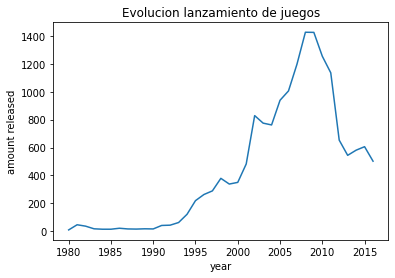

In [11]:
#Evaluamos la cantidad de juegos lanzados por año
df.groupby('year_of_release')['name'].count().plot()
plt.xlabel('year')
plt.ylabel('amount released')
plt.legend('', frameon=False)
plt.title('Evolucion lanzamiento de juegos')

- Se observa una cantidad creciente desde 1980, un pico de cantidad de juegos lanzamos en el año 2008/ 2009 y luego una tendencia decreciente hacia 2016

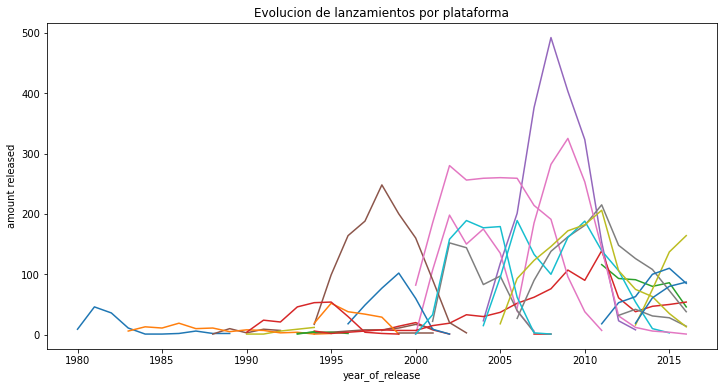

In [12]:
#Evaluamos la evolucionde lanzamientos por plataforma .

df.pivot_table(index = 'year_of_release', columns = 'platform', values= 'name', aggfunc = 'count').plot(figsize = (12,6))
plt.title("Evolucion de lanzamientos por plataforma")
plt.legend(loc = 0)
plt.ylabel('amount released')
plt.legend('', frameon=False)


 - Se observa en el grafico una vida media de las plataformas en torno a los 10 años. En la mayoria de los casos se observa un crecimiento de lanzamientos desde el inicio hasta el año cinco donde comienza a decrecer la cantidad hasta desaparecer por completo. Tomaremos entonces los datos de los ultimos años para realizar los analisis 

Text(0, 0.5, 'total sales_$')

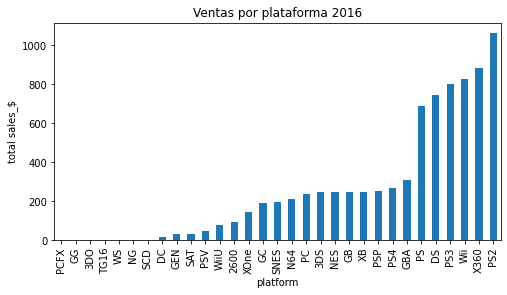

In [13]:
#Evaluamos las ventas por plataforma
df.groupby('platform')['total_sales'].sum().sort_values().plot(kind='bar', figsize = (8,4), title = 'Ventas por plataforma 2016')
plt.xlabel('platform')
plt.ylabel('total sales_$')




 - Las plataformas lideres en ventas en 2016 son: PS2, X360, Wii, PS3, DS y PS

In [14]:
#segmentamos los datos de los ultimos años
df_last_years = df[df['year_of_release']>=2014]

/tmp/ipykernel_27/3152523317.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


([<matplotlib.axis.XTick at 0x7f74c9203fa0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

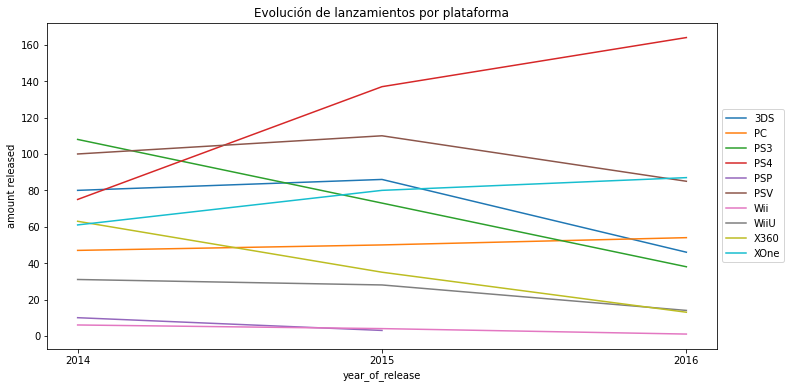

In [15]:
df_last_years.pivot_table(index = 'year_of_release', columns = 'platform', values= 'name', aggfunc = 'count').plot(figsize = (12,6))
plt.title("Evolución de lanzamientos por plataforma")
plt.legend(loc = 0)
plt.ylabel('amount released')
ax = plt.axes()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([2014, 2015, 2016])



 - Se observa que las plataformas lideres en ventas no cuentan con lanzamientos en los ultimos años y  / o cuentan con una curva decreciente de los mismos por lo que es de esperar que sus ventas no aumenten en adelante. 
 - La plataformas mas nuevas y que muestran una tendencia creciente de lanzamientos son PS4 y Xone, por lo que se perciben como potencialmente rentables

Text(0.5, 1.0, 'Ventas por plataforma')

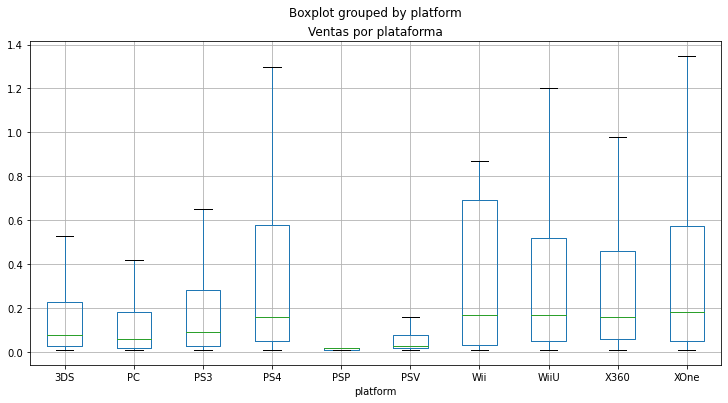

In [18]:
# Analisis de ventas por tipo de plataforma
#Se dibuja un diagrama de cajas sin valores atipicos

df_last_years.boxplot(column = 'total_sales', by = 'platform', showfliers=False, figsize = (12,6))
plt.title("Ventas por plataforma")

- Al comparar las ventas promedio de distintas plataformas (con lanzamientos en los ultimos años), se observa que aquellas con mayores valor medio de ventas son: Xone, wii, wiiu y PS4, mientras que las de menores valores medio de venta son PSP y PSV

In [ ]:
# Evaluamos la relacion entre las reseñas y la ventas de una plataforma popular ("PS4")

df_last_years.query('platform == "PS4"').plot(x= 'total_sales', y = 'user_score', kind='scatter')
plt.title("Relacion entre ventas y critica de usuarios")


In [ ]:
#correlacion con USer score
df_last_years.query('platform == "PS4"')['total_sales'].corr(df['user_score'])

In [ ]:
#correlacion con critic score
df_last_years.query('platform == "PS4"')['total_sales'].corr(df['critic_score'])

 - La correlacion entre las criticas de usuarios y las ventas en PS4 es placticamente nula. Para el casod e criticas de especialistas, existe un cierto impacto (leve) sobre las ventas

In [ ]:
#buscamos juegos con ventas en mas de una plataformas

df_last_years.groupby('name').agg({'total_sales':['sum','size']}).sort_values(by= ('total_sales',  'sum'), ascending = False).head()



In [ ]:
# Evaluamos las ventas de un juego popular (FIFA 15) en las distintas plsataformas

df_last_years.query('name == "FIFA 15"').groupby('platform')['total_sales'].sum().sort_values().plot(kind='bar')
plt.title("Ventas de FIFA 15")




In [ ]:
# Evaluamos las ventas de un juego popular ( Call of Duty) en las distintas plsataformas

df_last_years.query('name == "Call of Duty: Black Ops 3"').groupby('platform')['total_sales'].sum().sort_values().plot(kind='bar')
plt.title("Ventas de Call of Duty")


 - En el caso de FIFA 15, la mayor cantidad de ventas en 2016 se dieron en la paltaforma PS4, seguida por PS3 y X360
 - La paltaforma mas popular para el juego "call of duty" , tambien fue PS4, pero en este caso el segundo lugar lo ocupa Xone


In [ ]:
#Cuota de mercado por genero

df_last_years.groupby('genre')['total_sales'].sum().plot(kind='pie', y = 'total_sales', autopct='%1.1f%%', title ="Cuota de mercado por genero",figsize = (12,6))
ax = plt.axes()
ax.set_ylabel(None)                                              
                                              
                                              
                                              

In [ ]:
##
df_last_years.groupby('genre')['total_sales'].sum().sort_values()

- Los generos mas rentables en 2016 fueron Action y Shooter, seguidos de Sports y Role playing, mientras que aquellos con menor cantidad de ventas fueron los generos de Puzzle y Strategy

## Perfil de usuario por region

In [ ]:
#Perfil EU Popular genres

df_pop_genres = df_last_years.query('genre in ("Shooter", "Action","Sports", "Role-Playing", "Misc", "Fighting") ')
df_pop_genres.groupby('genre')['eu_sales'].sum().plot(kind='pie', y = 'eu_sales', autopct='%1.1f%%', title ="Cuota de mercado por genero en EU",figsize = (12,6))
ax = plt.axes()
ax.set_ylabel(None)

In [ ]:
#mercado na
df_pop_genres.groupby('genre')['na_sales'].sum().plot(kind='pie', y = 'na_sales', autopct='%1.1f%%', title ="Cuota de mercado por genero en NA",figsize = (12,6))
ax = plt.axes()
ax.set_ylabel(None)

In [ ]:
#MErcado JP 

df_pop_genres.groupby('genre')['jp_sales'].sum().plot(kind='pie', y = 'jp_sales', autopct='%1.1f%%', title ="Cuota de mercado por genero en JP",figsize = (12,6))
ax = plt.axes()
ax.set_ylabel(None)

 - Los generos más populares tanto en el mercado de eu como en na, son Action, Shooters y Sports con cerca del 80% de cuota de mercado. En el caso del mercado de JP, el genero mas popular es Role - playing.\, con cerca del 40% de cuota de mercado, seguido por Action

In [ ]:
# Analis de plataformas principales 

df_last_years.groupby('platform')['total_sales'].sum().sort_values(ascending= False)

In [ ]:
#Cuota de mercado por plataforma JP
df_pop_platform = df_last_years.query('platform in ("PS4","XOne", "3DS", "PS3","X360")')
df_pop_platform.groupby('platform')['jp_sales'].sum().plot(kind='pie', y = 'jp_sales', autopct='%1.1f%%', title ="Cuota de mercado por Plataforma en JP",figsize = (12,6))
ax = plt.axes()
ax.set_ylabel(None)

In [ ]:
#
df_pop_platform.groupby('platform')['eu_sales'].sum().plot(kind='pie', y = 'eu_sales', autopct='%1.1f%%', title ="Cuota de mercado por Plataforma en EU",figsize = (12,6))
ax = plt.axes()
ax.set_ylabel(None)

In [ ]:
#Cuota de mercado por plataforma na
df_pop_platform .groupby('platform')['na_sales'].sum().plot(kind='pie', y = 'na_sales', autopct='%1.1f%%', title ="Cuota de mercado por Plataforma en NA",figsize = (12,6))
ax = plt.axes()
ax.set_ylabel(None)

 - Las plataformas mas populares tanto en Eu como en NA son Ps4 y Xone, con más del 70% del cuuota del mercado
 - En el caso de JP, la plataforma mas popular es 3DS con mas del 60% de cuota de mercado. EL segundo lugar en ventas lo ocupa PS4 con 21%

In [ ]:
# Impacto de las clasificaciones sobre las ventas

df_last_years.groupby('rating')['eu_sales'].sum().sort_values().plot(kind='bar',figsize=(6,3), title = 'Ventas EU por categoría')

In [ ]:

df_last_years.groupby('rating')['na_sales'].sum().sort_values().plot(kind='bar',figsize=(6,3), title = 'Ventas NA por categoría')



In [ ]:

df_last_years.groupby('rating')['jp_sales'].sum().sort_values().plot(kind='bar',figsize=(6,3), title = 'Ventas JP por categoría')



 - Tanto en el mercado de EU como en el mercado de NA, las mayores ventas de dan en la categoía "M"
 - En el caso del mercado de JP, la categoría mas popular es la "T"

## Prueba de Hipotesis

Caso 1: 
 - hipotesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
 - hipotesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las distintas

In [ ]:

df_sin_nan = df_last_years[~(df_last_years['user_score'].isna())]
df_sin_nan_xone = df_sin_nan.query('platform == "XOne"')
df_sin_nan_pc =  df_sin_nan.query('platform == "PC"')

results_platform = st.ttest_ind(df_sin_nan_pc['user_score'] ,df_sin_nan_xone['user_score'] )

alpha = 0.05
print('p-value: ', results_platform.pvalue)

if (results_platform.pvalue  < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

- Dado que pvalue > alpha , no se rechaza la hipotesis nula. Por lo tanto no podemos concluir que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC sean las mismas.

— Caso 2:

Hipotesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

Hipotesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

In [ ]:
df_sin_nan = df_last_years[~(df_last_years['user_score'].isna())]
df_sin_nan_sport = df_sin_nan.query('genre == "Sports"')
df_sin_nan_action =  df_sin_nan.query('genre == "Action"')

results_genre = st.ttest_ind(df_sin_nan_sport['user_score'] , df_sin_nan_action['user_score'] )

alpha = 0.05
print('p-value: ', results_genre.pvalue)

if (results_genre.pvalue  < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

- Dado que pvalue < alpha , se rechaza la hipotesis nula y se acepta la hipotesis alternativa. Por lo tanto no podemos concluir con un nivel de confianza del 95% que  las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

## Conclusiones

- Se detectaron valores ausentes en los datos.
- Los valores ausentes de score , rating y año de lanzamiento , no pueden completarse a partir de los datos del dataset, por lo que no se rellenaron.
- Los valores ausentes de las columnas categóricas “name” y “genre” se rellenaron con “unknown”
- Se detectaron tipo de datos incorrectos: 
    - Se cambiaron tipo de dato de “user score” y de “year_of _release” al tipo float e integer respectivamente
    - El valor TDB de “user score” se reemplaza por NAN para luego poder convertir los datos al tipo float
- Se llevaron los nombres de las columnas a minúsculas
- Se agregó una columna con el cálculo de ventas totales ya que era necesaria para poder realizar los análisis basados en ventas totales



Análisis de datos. 

* En el gráfico de evolución de cantidad de juegos lanzados por año, se observa una cantidad creciente desde 1980, un pico de cantidad de juegos lanzamos en el año 2008/ 2009 y luego una tendencia decreciente hacia el 2016
Se observa en el gráfico de evolución de lanzamientos por plataforma, una vida media de las plataformas en torno a los 10 años. En la mayoría de los casos se observa una un crecimiento de lanzamientos desde el inicio hasta el año cinco donde comienza a decrecer la cantidad hasta desaparecer por completo. 
Del grafico de barras de ventas por plataforma, se concluye que  las plataformas lideres en ventas en 2016 fueron: S2, X360, Wii, PS3, DS y PS, en ese orden

* Se trazó en el gráfico de evolución de lanzamientos por plataforma para los últimos años (excluyendo datos de años anteriores), y se observó que: 
    * Las plataformas lideres en ventas no cuentan con lanzamientos en los últimos años y o cuentan con una curva decreciente de los mismos por lo que es de esperar que sus ventas no aumenten en adelante.
    * La plataformas más nuevas y que muestran una tendencia creciente de lanzamientos son PS4 y Xone, por lo que se perciben como potencialmente rentables
Por este motivo, se toman los datos de los últimos años para realizar los análisis y proyecciones.

* Se trazaron diagramas de caja para las ventas totales por plataforma (de los últimos años) y se observó que aquellas con mayores ventas promedio son: Ps4, Wii y Xone, mientras que las de menores ventas promedio son PSP y PSV

* Se trazaron diagramas de dispersión para evaluar la relación entre las críticas de usuarios y expertos y las ventas. De las observación de los mismos y del cálculo de coeficiente de Pearson se concluye que: la relación entre las críticas de usuarios y las ventas es prácticamente nula, es decir que no impactan en el volumen de ventas. En el caso de las críticas de expertos, existe un cierto impacto sobre ventas, aunque leve.  Aquí vale destacar que las criticas cuentan con gran cantidad de valores ausentes por lo que es una conclusión parcial y no determinante.

* Se tomaron 2 juegos populares y de analizaron las ventas en las distintas plataformas. Para el caso de Fifa 15, la plataforma más popular resulto ser PS4, seguida por PS3y luego por X360. Para el caso de “call of duty”, la plataforma más popular fue PS4, al igual que para FIFA 15, pero en este caso la segunda plataforma más popular fue XOne.

* A nivel ventas totales, los géneros más rentables en 2016 fueron Action y Shooter, seguidos de Sports y Role playing, mientras que aquellos con menor cantidad de ventas fueron los generos de Puzzle y Strategy. 

* Del análisis de géneros por región surge que los géneros más populares tanto en el mercado de eu como en na, son Action, Shooters y Sports con cerca del 80% de cuota de mercado, mientras que, en el caso del mercado de JP, el género más popular es Role - playing., con cerca del 40% de cuota de mercado, seguido por Action

* Del análisis de cuota de mercado por tipo de plataforma y región surge que: las plataformas más populares tanto en Eu como en NA son Ps4 y Xone, con más del 70% del cuota del mercado. En el caso de JP, la plataforma más popular es 3DS con más del 60% de cuota de mercado. EL segundo lugar en ventas lo ocupa PS4 con 21%

* Al analizar las ventas por categoría, se concluye que: tanto en el mercado de EU como en el mercado de NA, las mayores ventas de dan en la categoría "M", mientras que en la región de JP, la categoría más popular es la "T"


Prueba de hipótesis. 

Se realizo una prueba de ttest de igualdad de medias para probar 2 hipótesis. Se tomo un nivel de significancia de 5%:

Caso 1: 
 - Hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
 
 - Hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las distintas.
 
Resultado: dado que pvalue resulto mayor a alpha , no se rechaza la hipótesis nula. Por lo tanto no podemos concluir que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC sean las mismas.

Caso 2:

- Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
- Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes
 
Resultado: dado  que pvalue resulto menor que  alpha , se rechaza la hipótesis nula y se acepta la hipótesis alternativa. Por lo tanto no podemos concluir con un nivel de confianza del 95% que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
